In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


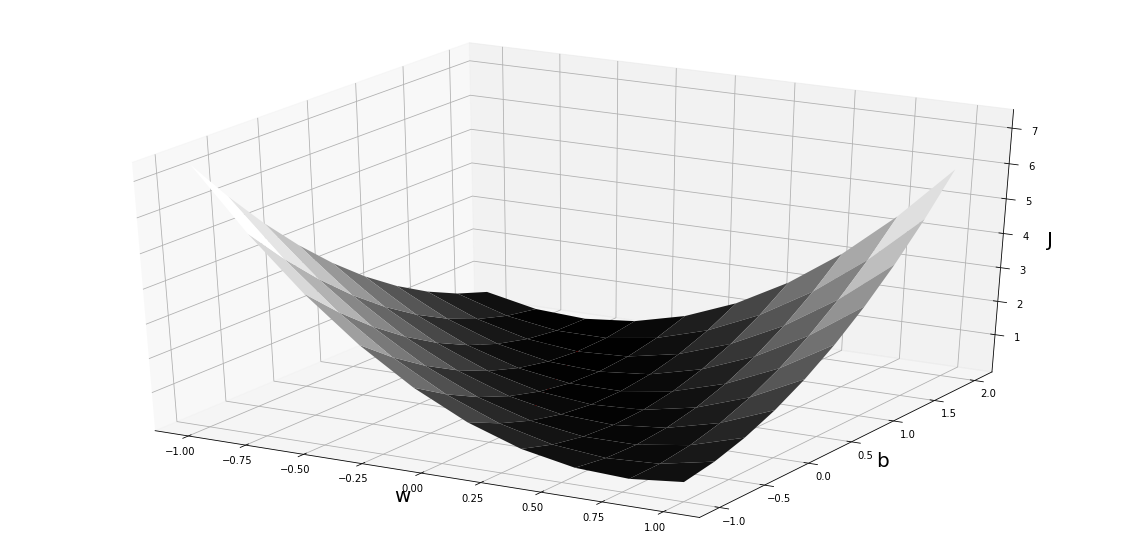

In [3]:
# 线性回归简单实现，针对只有1个特征值的梯度下降可视化

# -----------定义数据-------------
x = np.linspace(1, np.pi, 50).reshape(-1, 1)
y = np.sin(x) + np.random.normal(0, 0.15, len(x)).reshape(-1, 1)

# -------作J关于w,b的3d图以便观察梯度下降过程-------
ws = np.linspace(-1, 1, 10)
bs = np.linspace(-1, 2, 10)
grid = np.meshgrid(ws, bs)
J = [sum((x * grid[0][i] - np.tile(y, 10) + np.tile(grid[1][i].reshape(1, -1), (50, 1)))**2)/(2*x.shape[0]) for i in range(len(bs))]

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(*grid, np.array(J), cmap=plt.get_cmap('Greys_r'))
ax.set_xlabel('w', fontsize=20)
ax.set_ylabel('b', fontsize=20)
ax.set_zlabel('J', fontsize=20)


# ----------梯度下降开始-------------

# 初始值
w = b = 0
alpha = 0.2

# 保存更新过程中的值
ws, bs, J = [], [], []

for i in range(500):
    j = sum((x * w + b - y)**2)/(2*x.shape[0])
    J.append(j)
    ws.append(w)
    bs.append(b)
    jb = sum((x*w+b-y))/x.shape[0]
    jw = sum(x*(x*w+b-y))/x.shape[0]
    w -= alpha * jw
    b -= alpha * jb
ax.plot(np.array(ws).reshape(-1, ), np.array(bs).reshape(-1, ), np.array(J).reshape(-1, ), color='r')


Text(0, 0.5, 'J')

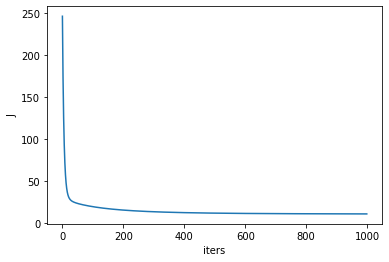

In [10]:
# 线性回归封装版，向量化支持多变量
from sklearn import datasets
from linear_regression.linear_reg import LinearReg

# 加载数据集
boston = datasets.load_boston()

# 数据预处理， 归一化，梯度下降必须要有这一过程，不然多变量回归时梯度下降无法收敛
xt = (boston.data - boston.data.mean(axis=0)) / (boston.data.max(axis=0) - boston.data.min(axis=0) + 1e-9)
yt = boston.target.reshape(-1, 1)

line_reg = LinearReg()
line_reg.fit(xt, yt, iters=1000, alpha=0.1)
plt.plot(range(len(line_reg.args['loss'])), line_reg.args['loss'])
plt.xlabel('iters')
plt.ylabel('J')
